In [1]:
import pandas as pd
import numpy as np
import cnvutils
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
counts = cnvutils.get_counts_table()

C:\Users\chels\anaconda3\envs\notebooks\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [6]:
reds = ['#FFFFFF', '#FDF0F0', '#FCE2E2', '#FAD3D3', '#F8C5C5', '#F6B6B6', '#F5A7A7', '#F39999', '#F18A8A', '#EF7B7B', '#EE6D6D', '#EC5E5E', '#EA5050', '#E84141', '#E73232', '#E52424', '#E31515']
blues = ['#FFFFFF', '#F2F0FD', '#E5E0FA', '#D7D1F8', '#CAC2F5', '#BDB2F3', '#B0A3F0', '#A393EE', '#9684EB', '#8875E9', '#7B65E6', '#6E56E4', '#6147E1', '#5437DF', '#4628DC', '#3918DA', '#2C09D7']
gradient = blues[::-1] + reds

In [18]:
counts_pivot = counts.pivot_table(index=['Name', 'cancer', 'chromosome'], columns="variable")
counts_pivot.columns = counts_pivot.columns.to_flat_index()
counts_pivot = counts_pivot.drop(columns=('start_bp', 'gain'))
counts_pivot = counts_pivot.drop(columns=('end_bp', 'gain'))
counts_pivot = counts_pivot.rename(columns={counts_pivot.columns[0]: 'end_bp', counts_pivot.columns[1]: 'start_bp', counts_pivot.columns[2]: 'gain', counts_pivot.columns[3]: 'loss'})

In [19]:
counts_pivot['length'] = counts_pivot.end_bp - counts_pivot.start_bp
counts_pivot['value'] = counts_pivot.gain - counts_pivot.loss

In [20]:
def map_color(val):
    i = (val + 85) // 5
    if i < 0:
        i = 0
    if i > 33:
        i=33
    return gradient[int(i)]

In [21]:
counts_pivot['color'] = counts_pivot.value.apply(map_color)

In [24]:
counts_pivot

,Name,cancer,chromosome,end_bp,start_bp,gain,loss,length,value,color
0,A1BG,BRCA,19,58353492.0,58345178.0,22.0,14.0,8314.0,8.0,#FDF0F0
1,A1BG,CCRCC,19,58353492.0,58345178.0,3.0,0.0,8314.0,3.0,#FFFFFF
2,A1BG,COLON,19,58353492.0,58345178.0,22.0,16.0,8314.0,6.0,#FDF0F0
3,A1BG,ENDO,19,58353492.0,58345178.0,4.0,6.0,8314.0,-2.0,#FFFFFF
4,A1BG,GBM,19,58353492.0,58345178.0,33.0,5.0,8314.0,28.0,#F6B6B6
...,...,...,...,...,...,...,...,...,...,...
222800,ZZEF1,LSCC,17,4143030.0,4004445.0,8.0,49.0,138585.0,-41.0,#9684EB
222801,ZZEF1,LUAD,17,4143030.0,4004445.0,4.0,41.0,138585.0,-37.0,#A393EE
222802,ZZEF1,OVARIAN,17,4143030.0,4004445.0,6.0,62.0,138585.0,-56.0,#6E56E4
222803,hsa-mir-1253,HNSCC,17,2748182.0,2748078.0,7.0,15.0,104.0,-8.0,#F2F0FD


In [23]:
counts_pivot.reset_index(inplace=True)

In [31]:
CHROMOSOMES = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

posx and posy should be finite values
posx and posy should be finite values


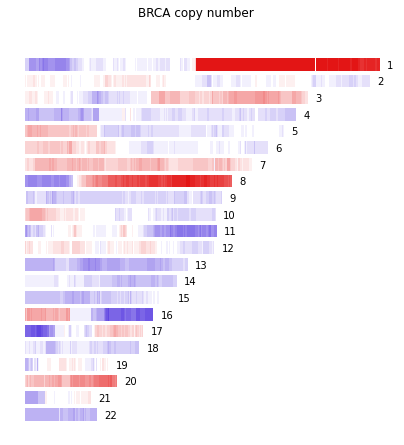

posx and posy should be finite values
posx and posy should be finite values


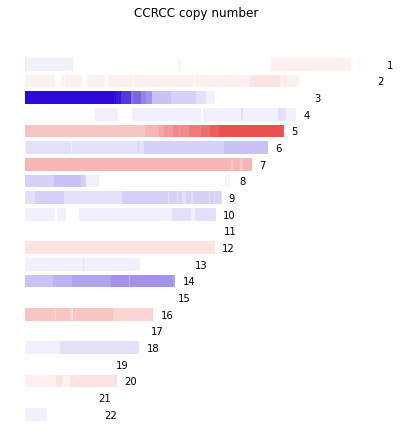

posx and posy should be finite values
posx and posy should be finite values


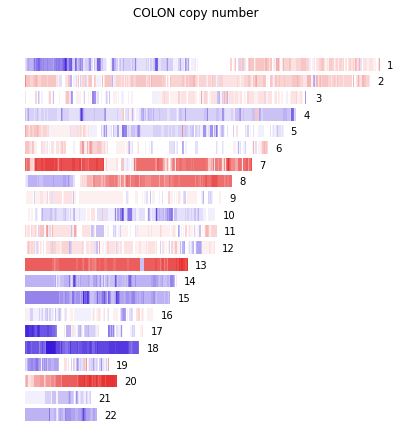

posx and posy should be finite values
posx and posy should be finite values


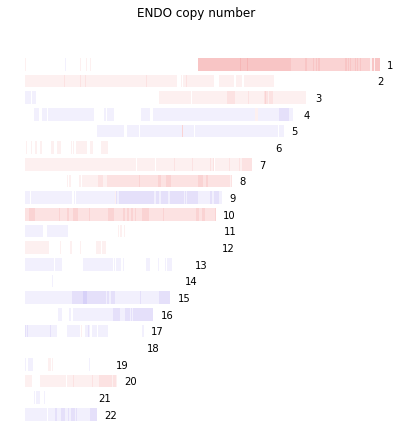

posx and posy should be finite values
posx and posy should be finite values


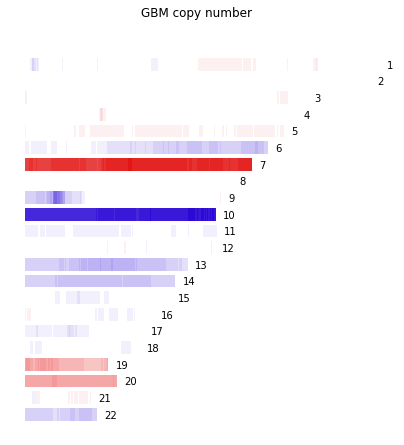

posx and posy should be finite values
posx and posy should be finite values


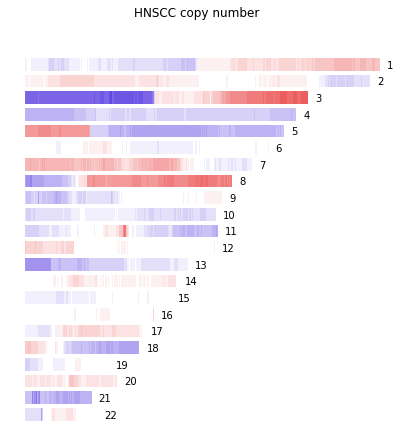

posx and posy should be finite values
posx and posy should be finite values


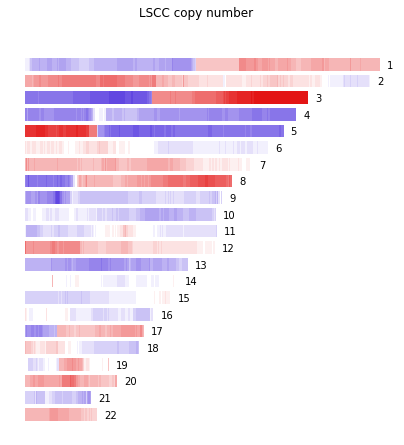

posx and posy should be finite values
posx and posy should be finite values


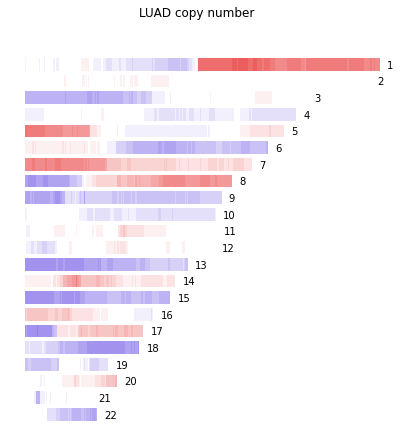

posx and posy should be finite values
posx and posy should be finite values


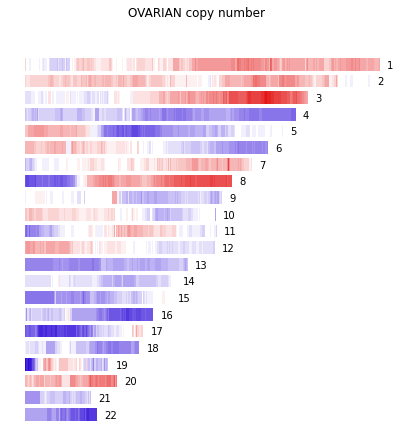

In [42]:
for cancer in counts.cancer.unique():
    fig, ax = plt.subplots(nrows=len(CHROMOSOMES),figsize=(7,7), sharex=True, sharey=False)
    cancer_df = counts_pivot[counts_pivot.cancer == cancer]
    count = 0
    for chromosome in CHROMOSOMES:
        df = cancer_df[cancer_df.chromosome == chromosome]
        df = df.sort_values('start_bp')
        start_values = df.start_bp
        continuous_values = list()
        prev = 0
        for val in start_values:
            continuous_values.append((prev, val-prev))
            prev = val
        ax[count].broken_barh(continuous_values, (0,2), facecolors=df.color)
        ax[count].text(np.max(start_values)+5000000, 0.35, chromosome)
        ax[count].set_frame_on(False)
        ax[count].get_xaxis().set_visible(False)
        ax[count].get_yaxis().set_visible(False)
        count += 1
    fig.suptitle(f'{cancer} copy number')